<a href="https://colab.research.google.com/github/AryamanPurohit/BGMI_Player_Performance_Prediction_Project/blob/main/BGMIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color ="yellow" ><center>**BGMI PLAYER PERFORMANCE PREDICTION PROJECT**</center></font>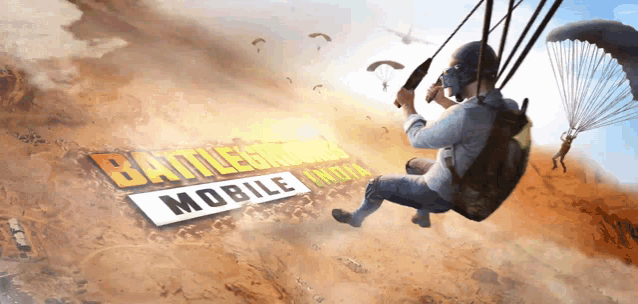

### Table Of Contents

*   [Importing Libraries](#import)
*   [Importing Dataset](#data)
*   [Data Wrangling](#wrangle)
*   [Feature Engineering](#feature)
*   [Machine Learning Model](#model)

## **IMPORTING LIBRARIES**<a class = 'anchor' id = 'import'></a>

In [ ]:
#For Ignore Warnings:
import warnings
warnings.filterwarnings("ignore")

#For Data storing and manipulation
import numpy as np
import pandas as pd

#For Visualization :
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
!pip install catboost
import catboost as cb

## **IMPORTING DATASET FROM KAGGLE**<a class="anchor" name="data"></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ashishjangra27/pubg-games-dataset

pubg-games-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip pubg-games-dataset

Archive:  pubg-games-dataset.zip
replace PUBG_Game_Prediction_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [ ]:
#Glance Of the data
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
# Shape Of the dataset
data.shape

(4446966, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## **Data Wrangling**<a class ="anchor" name="**wrangle**"></a>

**Checking for null values in target column (winPlacePerc)**

In [ ]:
data[data["winPlacePerc"].isnull()==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
#Removing row that has null value in winPlacePerc column
data.drop(data[data["winPlacePerc"].isnull()==True].index,inplace =True)

data[data["winPlacePerc"].isnull()==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


**Adding new column to get Total Players in a match**

In [ ]:
group =data.groupby('matchId')
TotalPlayers = group['matchId'].transform('count')
TotalPlayers

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: matchId, Length: 4446965, dtype: int64

In [ ]:
data["TotalPlayers"] = TotalPlayers
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalPlayers
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [ ]:
len(data[data['TotalPlayers']>=75]['TotalPlayers'])/len(data["TotalPlayers"])*100

98.7110085192935

<font color="green">Note that almost 99 percent  of matches had 75 or more players

#### **ANALYSIS OF THE DATA**

**SO MANY ROADKILLS?**

In [ ]:
data[data['roadKills'] > 5].shape

(46, 30)

In [ ]:
data.drop(data[data['roadKills'] > 5].index, inplace = True)

**MORE THAN 30 KILLS**

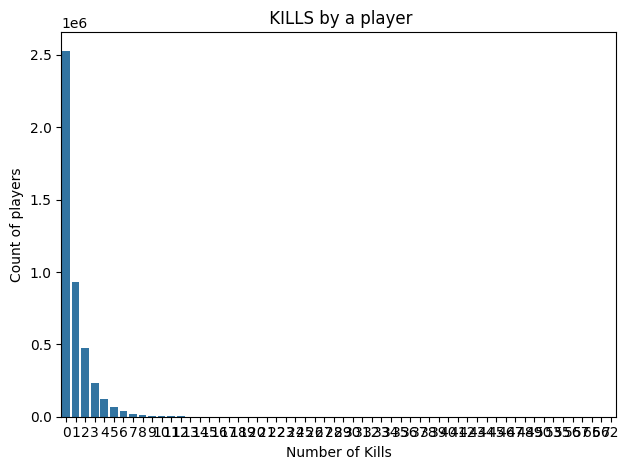

In [ ]:
sns.countplot(data = data, x = data['kills']).set_title(" KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.tight_layout()
plt.show()

Around 25 lakh players out of 44 lakh entries have 0 kills.

In [ ]:
data.drop(data[data['kills'] > 20].index, inplace = True)

**SO MANY HEADSHOTS?**

In [ ]:
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

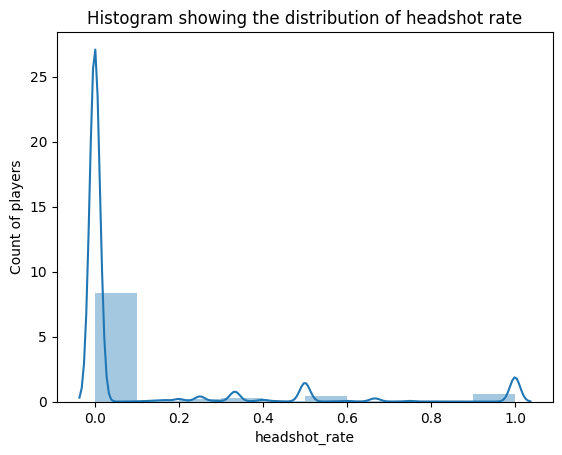

In [ ]:
# plotting the headshot rate distribution
sns.distplot(data['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [ ]:
#Dropping such rows
data.drop(data[(data['headshot_rate'] == 1)& (data['kills'] > 6)].index, inplace = True)

**KILLS WITHOUT MOVEMENT**

In [ ]:
#Creating a parameter for TOTAL DISTANCE TRAVELLED

In [ ]:
data["TotalDistance"]= data["walkDistance"]+data["swimDistance"]+data["rideDistance"]
# the player has not moved but still managed to do the kills
data['killswithoutMoving'] = ((data['kills']>0) & (data['TotalDistance'] ==0))

In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalPlayers,headshot_rate,TotalDistance,killswithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,0.0,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,0.0,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,0.0,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,0.0,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,0.0,49.7500,False


In [ ]:
#Kills with TotalDistance = 0
data[((data["kills"]>0) & (data["TotalDistance"] == 0))==True].shape

(1489, 33)

There are 1535 instances where there are kills without moving. This is highly inpractical.

In [ ]:
#Droping Rows having these instances
data.drop(data[((data["kills"]>0) & (data["TotalDistance"] == 0))==True].index,inplace =True)

In [ ]:
data[((data["kills"]>0) & (data["TotalDistance"] == 0))==True].shape

(0, 33)

All such instances are deleted

**VERY LONG SHOTS**

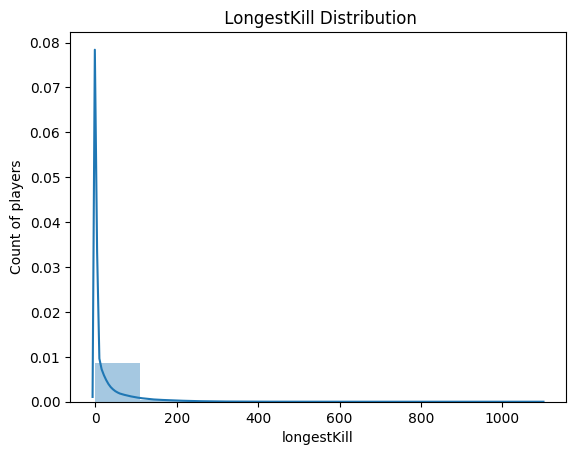

In [ ]:
sns.distplot(data['longestKill'], bins = 10).set_title(" LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [ ]:
#Dropping instances where distance is greater than 500
data.drop(data[data['longestKill']>=500].index, inplace = True)

**SO MANY WEAPONS ACQUIRED?**

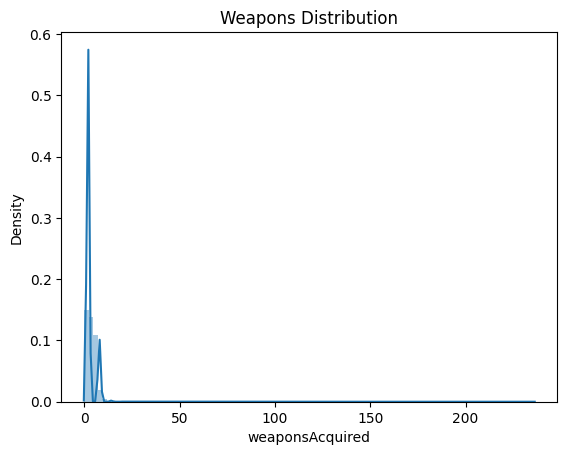

In [ ]:
sns.distplot(data['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [ ]:
data[data['weaponsAcquired']>=20].shape


(2925, 33)

In [ ]:
#Dropping instances where more thab 20 weapons are acquired
data.drop(data[data['weaponsAcquired']>=20].index, inplace = True)

## **Feature Engineering**<a class ="anchor" name="feature"></a>



As killing more players in a match having lower Total Players is harder than killing same number of players in a match having more Total Players, we will have to normalize the data

In [ ]:
n_factor = (100-data["TotalPlayers"])/100 + 1

In [ ]:
data['killsNorm'] = data['kills'] * n_factor
data['damageDealtNorm'] = data['damageDealt'] * n_factor
data['maxPlaceNorm'] = data['maxPlace'] * n_factor
data['matchDurationNorm'] = data['matchDuration'] * n_factor

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'TotalPlayers',
       'headshot_rate', 'TotalDistance', 'killswithoutMoving', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm'],
      dtype='object')

In [ ]:
#Creating few new features
data["Heal+Boosts"] = data["heals"]+data["boosts"]
data["TotalAssistance"] = data["assists"] + data["revives"]

In [ ]:
#Dropping unnecessary columns
data_pre=data.drop(columns =['Id','groupId','matchId','walkDistance','swimDistance','rideDistance','assists','boosts','revives','kills','damageDealt','matchDuration','maxPlace'])

In [ ]:
data_pre.columns

Index(['DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'killStreaks', 'longestKill', 'matchType', 'numGroups', 'rankPoints',
       'roadKills', 'teamKills', 'vehicleDestroys', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'TotalPlayers', 'headshot_rate',
       'TotalDistance', 'killswithoutMoving', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'Heal+Boosts', 'TotalAssistance'],
      dtype='object')

## **Machine Learning Model**<a class ="anchor" name="model"></a>

Separating Input and Target Features

In [ ]:
x = data_pre.drop(['winPlacePerc'], axis = 1)
y = data_pre['winPlacePerc']

Encoding Categorical data

In [ ]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [ ]:
x.shape

(4440190, 40)

In [ ]:
x.head()

,DBNOs,headshotKills,heals,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,0,60,1241,0,0.00,26,-1,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,57,0,0,0.00,25,1484,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,47,0,0,0.00,47,1491,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,75,0,0,0.00,30,1408,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,45,0,1,58.53,95,1560,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
features = x.columns

Scaling the data

In [ ]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.581805,-0.383868,-0.511011,0.450017,1.172697,-0.765285,-0.459897,-0.732178,-1.212407,-0.049583,...,-0.033907,-0.006242,-0.014598,-0.00898,-0.056826,-0.206594,-0.370724,-0.405033,1.23666,0.0
1,-0.581805,-0.383868,-0.511011,0.340729,-0.804710,-0.765285,-0.459897,-0.775140,0.803557,-0.049583,...,-0.033907,-0.006242,-0.014598,-0.00898,-0.056826,-0.206594,-0.370724,-0.405033,1.23666,0.0
2,-0.581805,-0.383868,-0.511011,-0.023562,-0.804710,-0.765285,-0.459897,0.170028,0.813060,-0.049583,...,-0.033907,-0.006242,-0.014598,-0.00898,-0.056826,-0.206594,-0.370724,-0.405033,-0.80863,0.0
3,-0.581805,-0.383868,-0.511011,0.996453,-0.804710,-0.765285,-0.459897,-0.560329,0.700383,-0.049583,...,-0.033907,-0.006242,-0.014598,-0.00898,-0.056826,-0.206594,-0.370724,-0.405033,1.23666,0.0
4,-0.581805,-0.383868,-0.511011,-0.096420,-0.804710,0.646648,0.726387,2.232213,0.906731,-0.049583,...,-0.033907,-0.006242,-0.014598,-0.00898,-0.056826,-0.206594,2.697423,-0.405033,-0.80863,0.0


Splitting the dataset

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3108133, 40) (3108133,)
(1332057, 40) (1332057,)


### Catboost Model

In [ ]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# GRID Search
grid = {'iterations': [100, 150],
       'learning_rate': [0.03, 0.1],
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482810	test: 0.5484970	best: 0.5484970 (0)	total: 512ms	remaining: 50.7s
1:	learn: 0.5334285	test: 0.5336394	best: 0.5336394 (1)	total: 812ms	remaining: 39.8s
2:	learn: 0.5190713	test: 0.5192792	best: 0.5192792 (2)	total: 1.26s	remaining: 40.9s
3:	learn: 0.5051518	test: 0.5053573	best: 0.5053573 (3)	total: 1.75s	remaining: 42.1s
4:	learn: 0.4916821	test: 0.4918826	best: 0.4918826 (4)	total: 2.25s	remaining: 42.7s
5:	learn: 0.4786322	test: 0.4788285	best: 0.4788285 (5)	total: 2.76s	remaining: 43.2s
6:	learn: 0.4660378	test: 0.4662288	best: 0.4662288 (6)	total: 3.29s	remaining: 43.7s
7:	learn: 0.4538823	test: 0.4540694	best: 0.4540694 (7)	total: 3.85s	remaining: 44.2s
8:	learn: 0.4421037	test: 0.4422885	best: 0.4422885 (8)	total: 4.39s	remaining: 44.4s
9:	learn: 0.4306910	test: 0.4308725	best: 0.4308725 (9)	total: 4.93s	remaining: 44.3s
10:	learn: 0.4196616	test: 0.4198416	best: 0.4198416 (10)	total: 5.55s	remaining: 44.9s
11:	learn: 0.4089958	test: 0.4091761	best: 0.4091761

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [ ]:
feature_importance_df


,features,importance
3,killPlace,41.017212
16,TotalDistance,24.412165
17,killsNorm,8.780038
5,killStreaks,6.130183
20,matchDurationNorm,5.202473
14,TotalPlayers,4.185643
7,numGroups,2.301770
6,longestKill,2.267410
21,Heal+Boosts,1.941121
0,DBNOs,1.199536


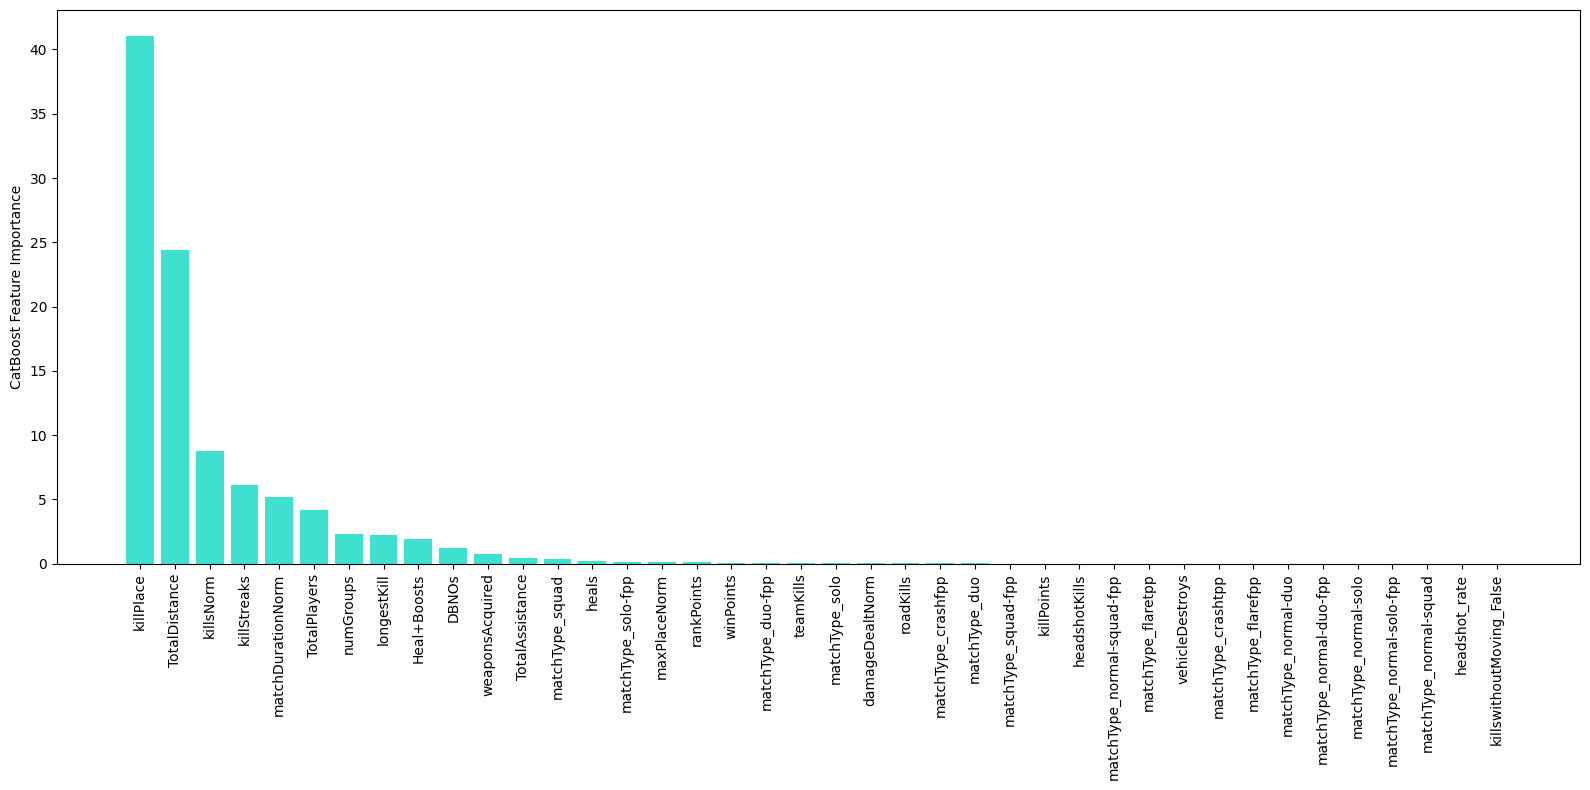

In [ ]:
plt.figure(figsize= (16,8))
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

##**PREDICTION ACCURACY**

In [ ]:
pred = model.predict(xtest)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>